# Linear Regression on MCR & MT Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file = r'/content/drive/MyDrive/Colab/mlp-mcr/dataset.csv'

Data

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv(file)

# dataset
dataset = df.values
X = dataset[:, 6] # mt column
print(np.min(X)," ",np.max(X))
print(len(X))
Y = dataset[:, 5] # mcr column
print(np.min(Y)," ",np.max(Y))
print(len(Y))

0.01   5858.833333333333
179996
0.0253444780071999   4874.2
179996


Correlation

In [4]:
from scipy.stats import pearsonr

corr, _ = pearsonr(X, Y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.752


Reshape + Split

In [5]:
X = X.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
print("Train: ", X_train.shape)
print("Val: ", X_val.shape)
print("Test: ", X_test.shape)

Train:  (115196, 1)
Val:  (28800, 1)
Test:  (36000, 1)


Linear Regression + Predict

In [6]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

Y_predict = reg.predict(X_test)

Error

In [7]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mae = mean_absolute_error(Y_test, Y_predict)
mape = mean_absolute_percentage_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
print("MAPE : ", mape)
print("MAE : ", mae)
print("MSE : ", mse)

MAPE :  25.127779769853454
MAE :  12.207620349886694
MSE :  7642.524581985544


Plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

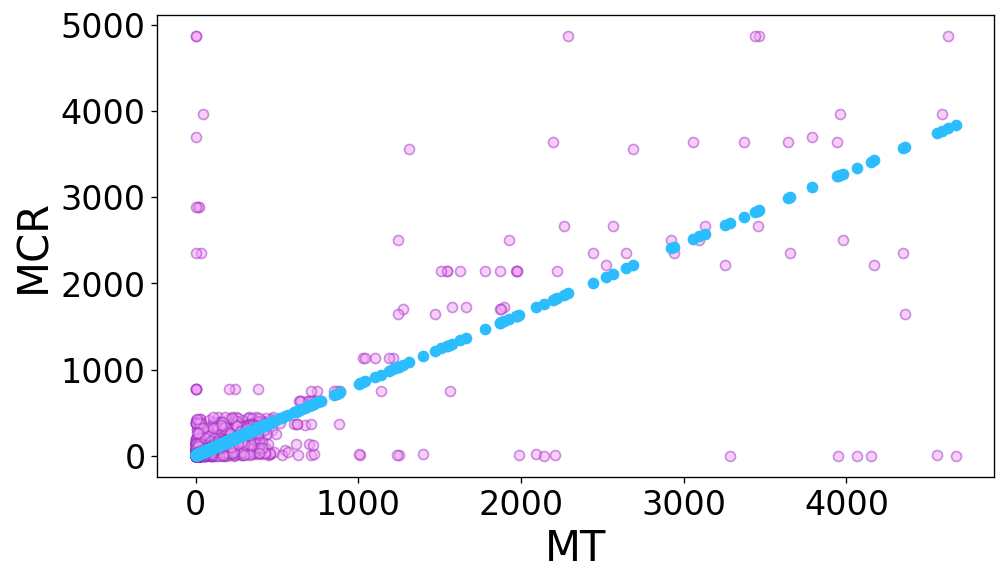

In [8]:
from google.colab import files
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5), dpi=120)
plt.scatter(x=X_test, y=Y_test, color="#F3A0F2", marker="o",alpha=0.5, edgecolors="#9D2EC5")
plt.subplot().tick_params(labelsize=20)
plt.scatter(x=X_test, y=Y_predict, color="#2CBDFE", linewidth=1)
plt.ylabel('MCR', fontsize=25)
plt.xlabel('MT', fontsize=25)
plt.savefig("lr-dist.pdf", format="pdf", bbox_inches="tight")
files.download("lr-dist.pdf")

Graph

27.879895644625353    26.744937358610525


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

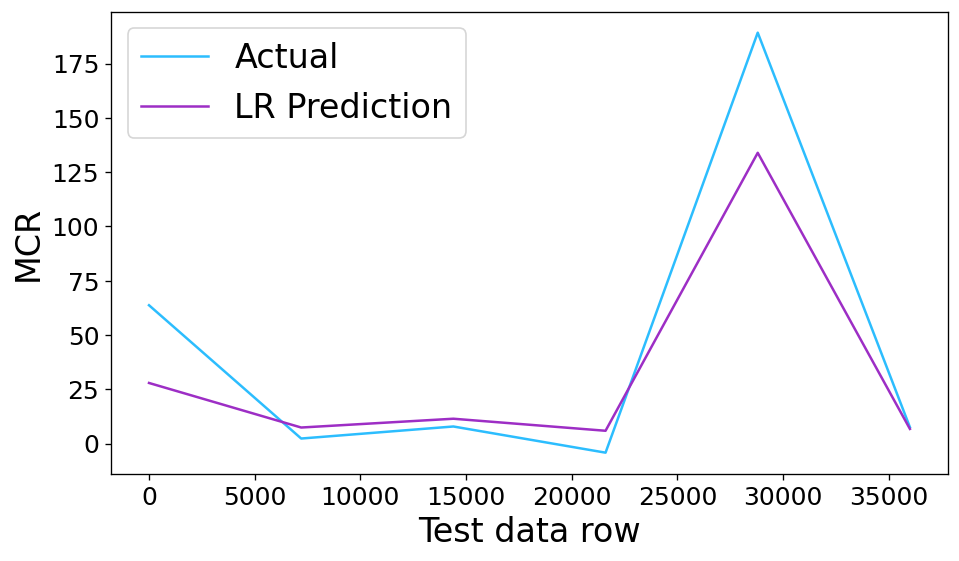

In [9]:
from scipy.interpolate import make_interp_spline
from google.colab import files

print(np.average(Y_predict), "  ", np.average(Y_test))
plt.figure(figsize=(9, 5), dpi=120)
X_Y_Spline = make_interp_spline(np.arange(36000), Y_test)

X_ = np.linspace(np.arange(36000).min(), np.arange(36000).max(), 6)
Y_ = X_Y_Spline(X_)

plt.plot(X_,Y_, label='Actual', color="#2CBDFE")
X_Y_Spline = make_interp_spline(np.arange(36000), Y_predict)
X_ = np.linspace(np.arange(36000).min(), np.arange(36000).max(), 6)
Y_ = X_Y_Spline(X_)
plt.plot(X_,Y_,  label='LR Prediction', color="#9D2EC5")
plt.subplot().tick_params(labelsize=15)
plt.ylabel('MCR', fontsize=20)
plt.xlabel('Test data row', fontsize=20)
plt.legend(fontsize=20)
plt.savefig("lr-predict.pdf", format="pdf", bbox_inches="tight")
files.download("lr-predict.pdf")